# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading Data

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') 
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
X = data.iloc[:,:12].to_numpy()
y = data.iloc[:,12:].to_numpy()

# Tree with default parameters

Fitting the Decision tree classifier 10 times using different splits each time.

In [4]:
i = 1
split_size = 0.3
while (i < 11):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    print("The training accuracy for split",i, "is",clf.score(X_train, y_train))
    print("The testing accuracy for split",i, "is",clf.score(X_test, y_test))
    print("==============================================================")
    i = i + 1

The training accuracy for split 1 is 1.0
The testing accuracy for split 1 is 0.8222222222222222
The training accuracy for split 2 is 1.0
The testing accuracy for split 2 is 0.7666666666666667
The training accuracy for split 3 is 1.0
The testing accuracy for split 3 is 0.7888888888888889
The training accuracy for split 4 is 1.0
The testing accuracy for split 4 is 0.8
The training accuracy for split 5 is 1.0
The testing accuracy for split 5 is 0.7777777777777778
The training accuracy for split 6 is 1.0
The testing accuracy for split 6 is 0.7222222222222222
The training accuracy for split 7 is 1.0
The testing accuracy for split 7 is 0.7777777777777778
The training accuracy for split 8 is 1.0
The testing accuracy for split 8 is 0.7111111111111111
The training accuracy for split 9 is 1.0
The testing accuracy for split 9 is 0.7333333333333333
The training accuracy for split 10 is 1.0
The testing accuracy for split 10 is 0.7333333333333333


Calculating the cross validation scores 

In [5]:
cross_validate(clf,X,y,cv=5)

{'fit_time': array([0.00199509, 0.0009973 , 0.00199461, 0.00199509, 0.00199389]),
 'score_time': array([0.00099683, 0.0009973 , 0.        , 0.00100803, 0.00099659]),
 'test_score': array([0.36666667, 0.9       , 0.71666667, 0.56666667, 0.6440678 ])}

Plotting the tree with default hyperparameters

[Text(522.1285714285715, 516.4200000000001, 'X[11] <= 73.5\ngini = 0.421\nsamples = 209\nvalue = [146, 63]'),
 Text(207.25714285714287, 462.06000000000006, 'X[8] <= 136.5\ngini = 0.282\nsamples = 53\nvalue = [9, 44]'),
 Text(63.77142857142857, 407.70000000000005, 'X[7] <= 0.85\ngini = 0.124\nsamples = 30\nvalue = [2, 28]'),
 Text(31.885714285714286, 353.34000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(95.65714285714286, 353.34000000000003, 'X[4] <= 45.0\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(63.77142857142857, 298.98, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(127.54285714285714, 298.98, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(95.65714285714286, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(159.42857142857144, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(350.74285714285713, 407.70000000000005, 'X[8] <= 138.5\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(286.9714285714286, 353.340000000000

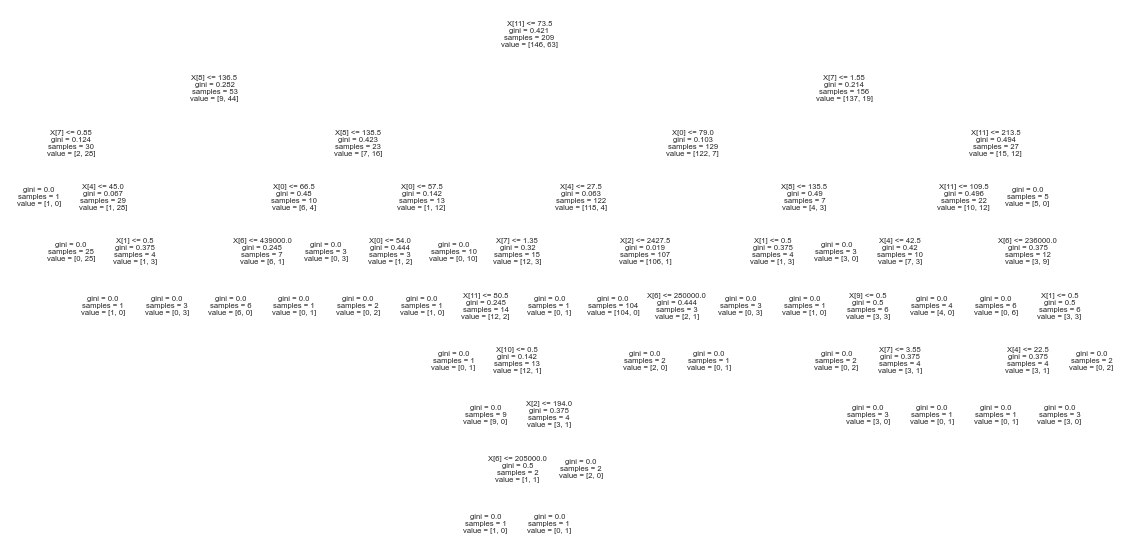

In [6]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf)

# Finding Min_Sample_Split (From Graph)

In [7]:
training_accuracy = []
testing_accuracy = []
no_of_nodes = []

i = 2

while (i < 12):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size)
    clf = tree.DecisionTreeClassifier(min_samples_split = i)
    clf = clf.fit(X_train, y_train)
    print("The training accuracy for split",i-1, "is",clf.score(X_train, y_train))
    training_accuracy.append(clf.score(X_train, y_train))
    print("The testing accuracy for split",i-1, "is",clf.score(X_test, y_test))
    testing_accuracy.append(clf.score(X_test, y_test))
    no_of_nodes.append(clf.tree_.node_count)
    print("==============================================================")
    i = i + 1

The training accuracy for split 1 is 1.0
The testing accuracy for split 1 is 0.7888888888888889
The training accuracy for split 2 is 0.9904306220095693
The testing accuracy for split 2 is 0.7888888888888889
The training accuracy for split 3 is 0.9856459330143541
The testing accuracy for split 3 is 0.8111111111111111
The training accuracy for split 4 is 0.9617224880382775
The testing accuracy for split 4 is 0.8222222222222222
The training accuracy for split 5 is 0.9473684210526315
The testing accuracy for split 5 is 0.7555555555555555
The training accuracy for split 6 is 0.937799043062201
The testing accuracy for split 6 is 0.7
The training accuracy for split 7 is 0.9330143540669856
The testing accuracy for split 7 is 0.7777777777777778
The training accuracy for split 8 is 0.9473684210526315
The testing accuracy for split 8 is 0.8222222222222222
The training accuracy for split 9 is 0.9330143540669856
The testing accuracy for split 9 is 0.7777777777777778
The training accuracy for split 

Accuracy Scores vs Number of nodes Graph (For the same split)

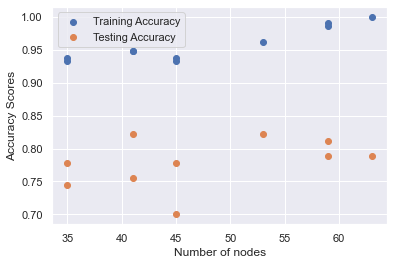

In [8]:
plt.scatter(no_of_nodes,training_accuracy,label = 'Training Accuracy') 
plt.scatter(no_of_nodes,testing_accuracy,label = 'Testing Accuracy') 

plt.xlabel('Number of nodes') 
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

# Finding Min_Samples_Split (Using Code)

Here, we first train the data using a single split and assign different values of min_samples_split incrementaly while storing the testing scores in a list.

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size)

possible_min_sample_split = list(i for i in range(2,51))
score_values_for_test_data = []
for x in possible_min_sample_split:
    clf = tree.DecisionTreeClassifier(min_samples_split = x)
    clf = clf.fit(X_train, y_train)
    score_values_for_test_data.append(clf.score(X_test, y_test))
    
# score_values_for_test_data 

We find the indexes of the list which give the maximum testing accuracy score and keep a note of these indexes to be used later.

In [10]:
# best_score_values_for_test_data = max(score_values_for_test_data)
same_scores = []
for x in range(0,49):
    if (score_values_for_test_data[x] == max(score_values_for_test_data)):
        same_scores.append(x + 2)        
print("The indexes of min_samples_split parameter:" ,same_scores) 
# score_values_for_test_data.index(best_score_values_for_test_data)

The indexes of min_samples_split parameter: [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


Testing Score vs Min_Sample_split Graph

We graph the testing scores against the min_samples_split and select the min_samples_split which gives us maximum testing score.

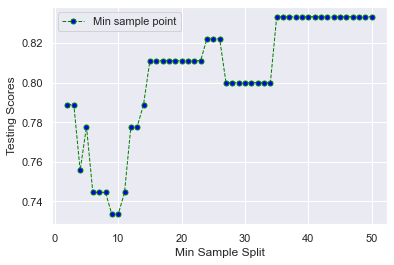

In [11]:
plt.plot(possible_min_sample_split,score_values_for_test_data, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=5, label = "Min sample point") 
plt.xlabel('Min Sample Split') 
plt.ylabel('Testing Scores')
plt.legend()
plt.show()

# Finding Max_Depth

Using the different min_samples_split found, we perform different combinations between min_samples_split and max_depth to produce the tree with maximum testing score.

The next four blocks of code is for finding out which combination of min_samples_split and max_depth works best for the tree.

In [12]:
possible_max_min = []
for i in same_scores:
    for j in range(1,21):
        possible_max_min.append((i,j))
# possible_max_min

Performing combinations

In [13]:
length = len(possible_max_min)
score_values_for_test_data_1 = []
for s in range(0,length):
    clf = tree.DecisionTreeClassifier(min_samples_split = possible_max_min[s][0], max_depth = possible_max_min[s][1])
    clf = clf.fit(X_train, y_train)
    score_values_for_test_data_1.append(clf.score(X_test, y_test))
# score_values_for_test_data_1 

Getting indexes of the list which give the best testing score

In [14]:
same_scores_1 = []
size = len(score_values_for_test_data_1) 
for x in range(0,size-1):
    if (score_values_for_test_data_1[x] == max(score_values_for_test_data_1)):
        same_scores_1.append(x)  
# same_scores_1   

In [15]:
import statistics
import math
optimum_score_values = math.floor(statistics.median(same_scores_1))

# Results

In [16]:
print("We find the best MIN_SAMPLES_SPLIT to be:" ,possible_max_min[optimum_score_values][0], "and best MAX_DEPTH to be:",possible_max_min[optimum_score_values][1])

We find the best MIN_SAMPLES_SPLIT to be: 42 and best MAX_DEPTH to be: 20


In [17]:
i = 1

training_accuracy_1 = []
testing_accuracy_1 = []
no_of_nodes_1 = []

while (i < 11):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size)
    clf = tree.DecisionTreeClassifier(min_samples_split = possible_max_min[optimum_score_values][0], max_depth = possible_max_min[optimum_score_values][1])
    clf = clf.fit(X_train, y_train)
    print("The training accuracy for split",i, "is",clf.score(X_train, y_train))
    training_accuracy_1.append(clf.score(X_train, y_train))
    print("The testing accuracy for split",i, "is",clf.score(X_test, y_test))
    testing_accuracy_1.append(clf.score(X_test, y_test))
    no_of_nodes_1.append(clf.tree_.node_count)
    print("==============================================================")
    i = i + 1

The training accuracy for split 1 is 0.8181818181818182
The testing accuracy for split 1 is 0.8555555555555555
The training accuracy for split 2 is 0.8421052631578947
The testing accuracy for split 2 is 0.8555555555555555
The training accuracy for split 3 is 0.861244019138756
The testing accuracy for split 3 is 0.8111111111111111
The training accuracy for split 4 is 0.8373205741626795
The testing accuracy for split 4 is 0.8666666666666667
The training accuracy for split 5 is 0.8708133971291866
The testing accuracy for split 5 is 0.7888888888888889
The training accuracy for split 6 is 0.8564593301435407
The testing accuracy for split 6 is 0.8222222222222222
The training accuracy for split 7 is 0.8516746411483254
The testing accuracy for split 7 is 0.8444444444444444
The training accuracy for split 8 is 0.861244019138756
The testing accuracy for split 8 is 0.8222222222222222
The training accuracy for split 9 is 0.8708133971291866
The testing accuracy for split 9 is 0.7888888888888889
The

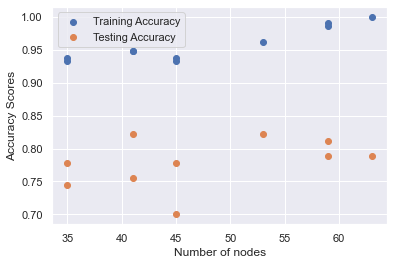

In [18]:
plt.scatter(no_of_nodes,training_accuracy,label = 'Training Accuracy') 
plt.scatter(no_of_nodes,testing_accuracy,label = 'Testing Accuracy') 

plt.xlabel('Number of nodes') 
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

[Text(472.15384615384613, 509.625, 'X[11] <= 67.0\ngini = 0.439\nsamples = 209\nvalue = [141, 68]'),
 Text(171.69230769230768, 441.675, 'X[7] <= 0.85\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(85.84615384615384, 373.725, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(257.53846153846155, 373.725, 'X[2] <= 159.5\ngini = 0.194\nsamples = 46\nvalue = [5, 41]'),
 Text(171.69230769230768, 305.775, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(343.38461538461536, 305.775, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(772.6153846153845, 441.675, 'X[4] <= 32.5\ngini = 0.279\nsamples = 161\nvalue = [134, 27]'),
 Text(600.9230769230769, 373.725, 'X[7] <= 1.35\ngini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(515.0769230769231, 305.775, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(686.7692307692307, 305.775, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(944.3076923076923, 373.725, 'X[7] <= 3.45\ngini = 0.127\nsamples = 117\nvalue = [109, 8]'),
 Tex

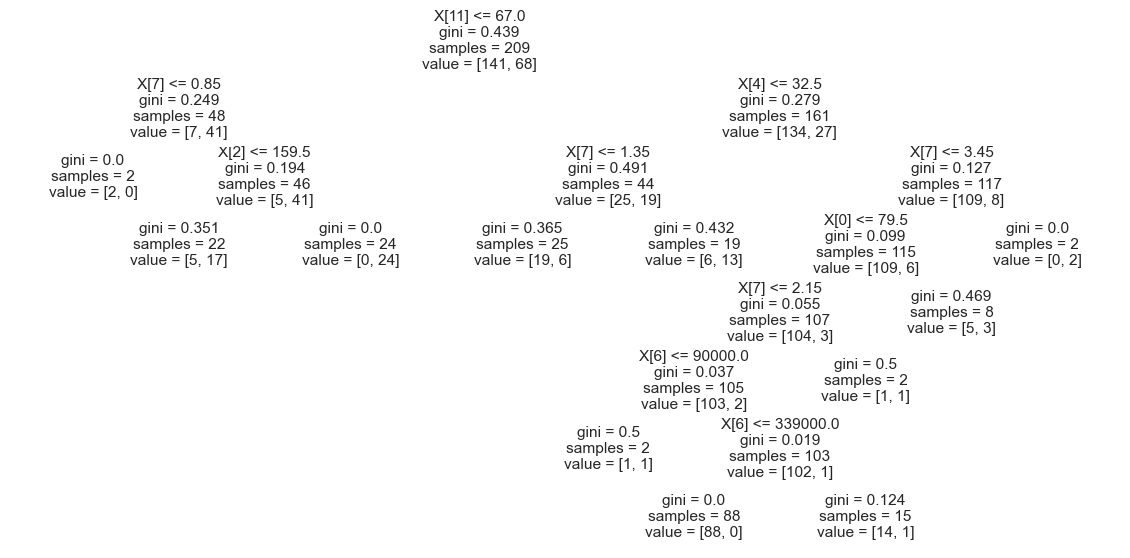

In [19]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf)

In [20]:
cross_validate(clf,X,y,cv=5)

{'fit_time': array([0.0009973 , 0.00199389, 0.00099826, 0.00099492, 0.00199604]),
 'score_time': array([0.00099826, 0.        , 0.00099683, 0.        , 0.00099683]),
 'test_score': array([0.45      , 0.86666667, 0.8       , 0.53333333, 0.6779661 ])}